# Problem Statement:

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

# Packages Used : 
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Sklearn
6. Tensorflow
7. Imblearn
8. xgboost

# Execution Time:
- Average Execution time - > 5 minutes
- Average Execution time with Grid Search CV (Commented) -> 1 hour

# Python Version
3.8.3

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Python Version : 
from platform import python_version
print(python_version())

3.8.3


In [3]:
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\chint\Downloads


# Reading the File 
Note: Need to define the path

In [4]:
train = pd.read_csv("train_yaOffsB.csv")

In [5]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


# Checked if the dataset is biased - Yes, the dataset is imbalanced

In [7]:
train.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [8]:
2313/(2313+74238+12307)

0.026030295527695875

In [9]:
train.Pesticide_Use_Category.value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

In [10]:
train.Number_Doses_Week.value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

In [11]:
train.Season.value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [12]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [13]:
#train.isnull().sum()

# Exploratary Data Analysis: 

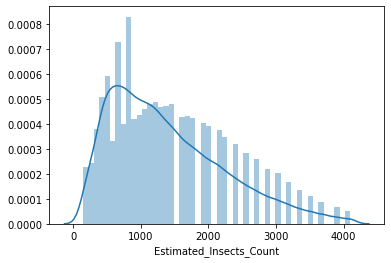

In [14]:
sns.distplot(train["Estimated_Insects_Count"])

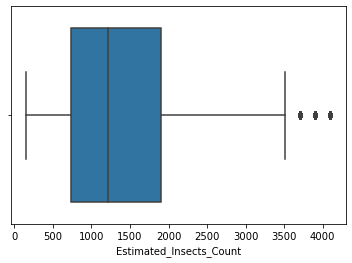

In [15]:
sns.boxplot(train["Estimated_Insects_Count"])

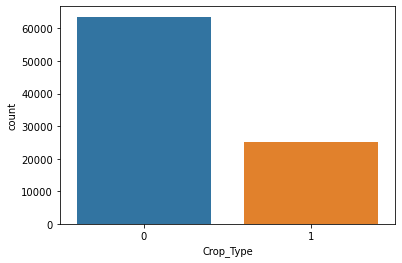

In [16]:
sns.countplot(train["Crop_Type"])

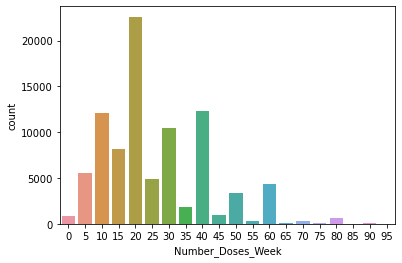

In [17]:
sns.countplot(train['Number_Doses_Week'])

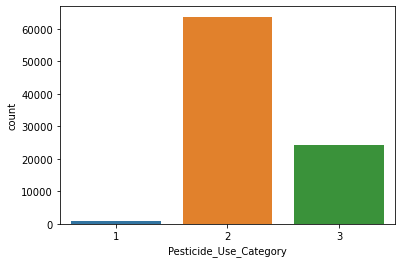

In [18]:
sns.countplot(train['Pesticide_Use_Category'])

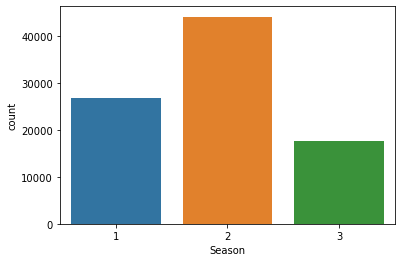

In [19]:
sns.countplot(train['Season'])

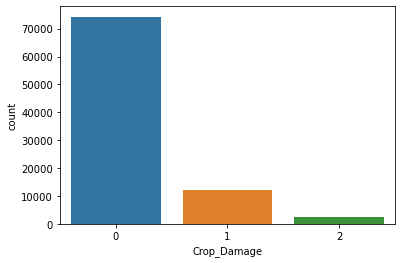

In [20]:

sns.countplot(train['Crop_Damage'])

# Transformation:

In [21]:
train["Estimated_Insects_Count"] = np.sqrt(train["Estimated_Insects_Count"])

# Missing value Treatment:

In [22]:
a = train[train['Number_Weeks_Used'].isnull()]

In [23]:
impute_list_weeks_a = a['Number_Doses_Week'].unique() #train

In [24]:
l1a = []
for i in impute_list_weeks_a:
    print(i)
    if i == 0:
        l1a.append(0)
    else:
        l1a.append(train[train['Number_Doses_Week'] == i]['Number_Weeks_Used'].median())
        
        

0
30
10
45
20
50
40
5
15
25
35
60
80
70
55
90
65
95
75


In [25]:
train["Number_Weeks_Used_Treated"] = train['Number_Doses_Week'].replace(impute_list_weeks_a,l1a)

In [26]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Number_Weeks_Used_Treated
0,F00000001,13.711309,1,0,1,0,0.0,0,1,0,0.0
1,F00000003,14.456832,1,0,1,0,0.0,0,2,1,0.0
2,F00000004,16.031220,1,0,1,0,0.0,0,2,1,0.0
3,F00000005,16.031220,1,1,1,0,0.0,0,2,1,0.0
4,F00000006,18.493242,1,0,1,0,0.0,0,2,1,0.0


In [27]:
mask_a = train['Number_Weeks_Used'].isnull()

In [28]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].mask(mask_a, train["Number_Weeks_Used_Treated"])

In [29]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage',
       'Number_Weeks_Used_Treated'],
      dtype='object')

# Feature Engineering:

In [30]:
train['Total_doses_used'] = train['Number_Doses_Week'] * train["Number_Weeks_Used"]

In [31]:
train[['Pesticide_Use_Category','Season']] = train[['Pesticide_Use_Category','Season']].astype(object)

In [32]:
train.drop("ID",axis = 1,inplace = True)

In [33]:
train = pd.get_dummies(train)

In [34]:
train['Number_Weeks_Quit'] = train['Number_Weeks_Quit'].astype('float')

In [35]:
train['Total_used_quit'] = train['Number_Weeks_Used'] + train['Number_Weeks_Quit']

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Estimated_Insects_Count    88858 non-null  float64
 1   Crop_Type                  88858 non-null  int64  
 2   Soil_Type                  88858 non-null  int64  
 3   Number_Doses_Week          88858 non-null  int64  
 4   Number_Weeks_Used          88858 non-null  float64
 5   Number_Weeks_Quit          88858 non-null  float64
 6   Crop_Damage                88858 non-null  int64  
 7   Number_Weeks_Used_Treated  88858 non-null  float64
 8   Total_doses_used           88858 non-null  float64
 9   Pesticide_Use_Category_1   88858 non-null  uint8  
 10  Pesticide_Use_Category_2   88858 non-null  uint8  
 11  Pesticide_Use_Category_3   88858 non-null  uint8  
 12  Season_1                   88858 non-null  uint8  
 13  Season_2                   88858 non-null  uin

In [37]:
train.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit',
       'Crop_Damage', 'Number_Weeks_Used_Treated', 'Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3',
       'Total_used_quit'],
      dtype='object')

# Model Building and Splitting the Data:

In [38]:
x = train[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type','Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3','Total_used_quit']]
y = train['Crop_Damage']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state=1)

In [41]:
y_train.value_counts()

0    66848
1    11052
2     2072
Name: Crop_Damage, dtype: int64

# Scaling the Data Using Standard Scaler: 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
Dt = DecisionTreeClassifier()

In [45]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dt = Dt.predict(X_val)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_val,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7390
           1       0.24      0.27      0.25      1255
           2       0.06      0.05      0.06       241

    accuracy                           0.75      8886
   macro avg       0.39      0.39      0.39      8886
weighted avg       0.75      0.75      0.75      8886



# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest_m = RandomForestClassifier()

In [51]:
forest_m.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_f = forest_m.predict(X_val)

In [53]:
print(classification_report(y_val,y_pred_f))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7390
           1       0.35      0.22      0.27      1255
           2       0.10      0.05      0.06       241

    accuracy                           0.81      8886
   macro avg       0.44      0.40      0.41      8886
weighted avg       0.77      0.81      0.79      8886



In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred_f)

0.809137969840198

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_f)
print(cm)

[[6903  436   51]
 [ 936  276   43]
 [ 144   86   11]]


# Random Forest Classifier Grid Search CV

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
paramgrid = {"max_depth":list(range(1,20,2)),"n_estimators":list(range(1,200,20))}

In [58]:
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1),paramgrid)

In [59]:
#grid_search.fit(X_train,y_train)

In [60]:
#grid_search.best_estimator_
#grid_search.fit(X_train,y_train)
#y_pred_x = grid_search.predict(X_val)
#print(classification_report(y_val,y_pred_x))

# XGBoost Classifier

In [61]:
from xgboost import XGBClassifier

In [62]:
xg_m = XGBClassifier()

In [63]:
grid_m =  XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
grid_m.fit(X_train,y_train)

C:\Users\chint\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=1, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [65]:
y_pred_x = grid_m.predict(X_val)

In [66]:
print(classification_report(y_val,y_pred_x))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      7390
           1       0.57      0.15      0.23      1255
           2       0.25      0.00      0.01       241

    accuracy                           0.84      8886
   macro avg       0.56      0.38      0.39      8886
weighted avg       0.80      0.84      0.80      8886



# K Fold Cross Validation: (KNN)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()

kfolds=10

cvs=cross_val_score(knn,x,y,cv=kfolds,scoring='accuracy')

cvs

array([0.82804411, 0.83130767, 0.82309251, 0.83153275, 0.82354265,
       0.82545577, 0.82230475, 0.82759397, 0.82824986, 0.82802476])

In [68]:
cvs.mean()

0.8269148804256151

# Neural Networks

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D


In [70]:
x = train[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit',
        'Number_Weeks_Used_Treated', 'Total_doses_used',
       'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3']]
a=pd.get_dummies(train['Crop_Damage'])

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,a,test_size=0.2,
                                               random_state=2)

In [72]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [73]:
st=StandardScaler()

In [74]:
st.fit(x_train)

StandardScaler()

In [75]:
x_train=pd.DataFrame(st.transform(x_train))
x_test=pd.DataFrame(st.transform(x_test))

In [76]:
weights = tf.Variable(tf.random.normal(shape=(14, 3), dtype=tf.float64))
biases  = tf.Variable(tf.random.normal(shape=(3,), dtype=tf.float64))

In [77]:
def logistic_regression(x):
    lr = tf.add(tf.matmul(x, weights), biases)
    return lr


def cross_entropy(y_true, y_pred):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)

def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights, biases])



In [78]:
epochs=2000
y_true=tf.cast(tf.argmax(y_test.values,axis=1),dtype=tf.int32)


In [79]:
preds=tf.cast(tf.argmax(logistic_regression(x_test.values),axis=1),dtype=tf.int32)


In [80]:
tf.reduce_mean(tf.cast(tf.equal(y_true,preds),dtype=tf.float32))
learning_rate=0.00001
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    
    dw,db=grad(inputs,tf.cast(outputs,'float32'))
    
    weights.assign_sub(learning_rate*dw)
    biases.assign_sub(learning_rate*db)
    
    if epoch%500==0:
        (accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

In [81]:
print(classification_report(y_val,y_pred_x))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      7390
           1       0.57      0.15      0.23      1255
           2       0.25      0.00      0.01       241

    accuracy                           0.84      8886
   macro avg       0.56      0.38      0.39      8886
weighted avg       0.80      0.84      0.80      8886



# We will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:


# Random Forest- SMOTETomek

In [82]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(x, y)

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X_smt, y_smt, test_size=0.20, random_state=1)

In [84]:
forest_m = RandomForestClassifier()

In [85]:
forest_m.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_f = forest_m.predict(X_val)

In [87]:
print(classification_report(y_val,y_pred_f))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14489
           1       0.85      0.82      0.83     14133
           2       0.91      0.91      0.91     14385

    accuracy                           0.88     43007
   macro avg       0.88      0.88      0.88     43007
weighted avg       0.88      0.88      0.88     43007



In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_f)
print(cm)

[[13139  1144   206]
 [ 1532 11520  1081]
 [  296   946 13143]]


In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred_f)

0.8789731904108633

In [90]:
labels = ["True 0","False 1","False 2","False 0","True 1","False 2","False 0","False 1","True 2"]


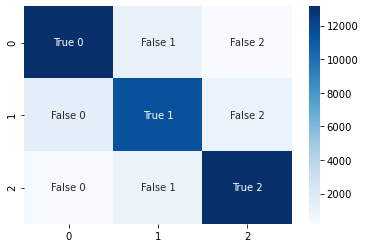

In [91]:
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

# XGBoost SMOTETomek

In [92]:
xg_m = XGBClassifier()

In [93]:
grid_m =  XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [94]:
grid_m.fit(X_train,y_train)

C:\Users\chint\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=1, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [95]:
y_pred_x = grid_m.predict(X_val)

In [96]:
print(classification_report(y_val,y_pred_x))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14489
           1       0.76      0.63      0.69     14133
           2       0.77      0.85      0.81     14385

    accuracy                           0.80     43007
   macro avg       0.80      0.80      0.80     43007
weighted avg       0.80      0.80      0.80     43007



# Decision Tree SMOTETomek:

In [97]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
y_pred_dt = Dt.predict(X_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     14489
           1       0.78      0.79      0.78     14133
           2       0.88      0.89      0.88     14385

    accuracy                           0.84     43007
   macro avg       0.84      0.84      0.84     43007
weighted avg       0.84      0.84      0.84     43007



# Logistic with SMOTETomek:

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

In [99]:
logr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
           n_jobs=1, random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [100]:


logr.fit(X_train,np.ravel(y_train))

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=1,
                   random_state=2, solver='liblinear')

In [101]:
y_prob=logr.predict_proba(X_val)

In [102]:
macro_roc_auc_ovo = roc_auc_score(np.ravel(y_val), y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(np.ravel(y_val), y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(np.ravel(y_val), y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(np.ravel(y_val), y_prob, multi_class="ovr",
                                     average="weighted")

In [103]:
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.825205 (macro),
0.825841 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.825992 (macro),
0.826963 (weighted by prevalence)


In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred_f)

0.8789731904108633